# Web Scraping and Introductory Data Analysis

Welcome to Homework 0, where we will delve into web scraping and perform an introductory data analysis. This homework will be a hands-on exercise that will help you become familiar with the process of extracting data from websites and conducting basic statistical analysis. We will also explore the concept of the Central Limit Theorem and its practical implications in data analysis.

## Objectives

By the end of this homework, you will be able to:

1. Set up a Python environment with the necessary libraries for web scraping and data analysis.
2. Write a web scraping script using Beautiful Soup and Selenium to collect data from a website.
3. Sample from the collected dataset and compare the statistics of the sample and the population.
4. Demonstrate the Central Limit Theorem using the data.

## Tasks

1. **Environment Setup**: Install the required libraries such as Beautiful Soup, Selenium, pandas, numpy, matplotlib, and seaborn.

2. **Web Scraping**: Write a script to scrape transaction data from [Etherscan.io](https://etherscan.io/txs). Use Selenium to interact with the website and Beautiful Soup to parse the HTML content.

3. **Data Sampling**: Once the data is collected, create a sample from the dataset. Compare the sample statistics (mean and standard deviation) with the population statistics.

4. **Central Limit Theorem Demonstration**: Draw multiple samples of varying sizes from the dataset and calculate their means. Plot the histograms of these sample means to demonstrate how the distribution of sample means approaches a normal distribution as the sample size increases.

## Deliverables

1. A Jupyter notebook with all the code and explanations.
2. A detailed report on the findings, including the comparison of sample and population statistics and the demonstration of the Central Limit Theorem.
Note: You can include the report in your notebook.

## Getting Started

Begin by setting up your Python environment and installing the necessary libraries. Then, proceed with the web scraping task, ensuring that you handle any potential issues such as rate limiting. Once you have the data, move on to the data sampling and statistical analysis tasks. Finally, demonstrate the Central Limit Theorem with your sample data.

Remember to document your process and findings in the Jupyter notebook, and to include visualizations where appropriate to illustrate your results. <br>
Good luck, and happy scraping!

## Data Collection (Etherscan)

In this section, we will use web scraping to gather transaction data from the Ethereum blockchain using the Etherscan block explorer. Our objective is to collect transactions from blocks 19263100 to 19263125.

To accomplish this task, we will employ web scraping techniques to extract the transaction data from the Etherscan website. The URL we will be targeting for our data collection is:

[https://etherscan.io/txs](https://etherscan.io/txs)

### Steps

1. **Navigate to the URL**: Use Selenium to open the Etherscan transactions page in a browser.

2. **Locate the Transaction Data**: Identify the HTML elements that contain the transaction data for the specified block range.

3. **Extract the Data**: Write a script to extract the transaction details e.g. Hash, Method, Block, etc.

4. **Handle Pagination**: If the transactions span multiple pages, implement pagination handling to navigate through the pages and collect all relevant transaction data.

5. **Store the Data**: Save the extracted transaction data into a structured format, such as a CSV file or a pandas DataFrame, for further analysis.

### Considerations

- **Rate Limiting**: Be mindful of the website's rate limits to avoid being blocked. Implement delays between requests if necessary.
- **Dynamic Content**: The Etherscan website may load content dynamically. Ensure that Selenium waits for the necessary elements to load before attempting to scrape the data.
- **Data Cleaning**: After extraction, clean the data to remove any inconsistencies or errors that may have occurred during the scraping process.

### Resources

- [Beautiful Soup Documentation](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)
- [Selenium Documentation](https://selenium-python.readthedocs.io/)
- [Pandas Documentation](https://pandas.pydata.org/docs/)
- [Ethereum](https://ethereum.org/en/)


<b>IMPORTANT NOTE!</b><br>
Possible driver version mismatch (is this ok?)

In [4]:
from bs4 import BeautifulSoup
from selenium import webdriver
import time
import pandas as pd

driver = webdriver.Chrome()

start_block = 19305023
end_block = 19305028

transactions = []

base_url = 'https://etherscan.io/txs'

page_number = 1
page_size = 100

while True:
    url = f'{base_url}?ps={page_size}&p={page_number}'

    driver.get(url)

    soup = BeautifulSoup(driver.page_source, 'html.parser')

    table = soup.find('table', {'class': 'table table-hover table-align-middle mb-0'})

    for row in table.find_all('tr')[1:]:  # Skip the header row
        cols = row.find_all('td')
        if cols:
            block_number = int(cols[3].text.strip())
            if start_block <= block_number <= end_block:
                transaction_hash = cols[1].text.strip()
                method = cols[2].text.strip()
                value = cols[-3].text.strip()
                txn_fee = cols[-2].text.strip()
                transactions.append([transaction_hash, method, block_number, value, txn_fee])
            elif block_number > end_block:
                break

    if block_number < start_block:
        break

    page_number += 1
    time.sleep(1)

driver.quit()

df = pd.DataFrame(transactions, columns=['Txn Hash', 'Method', 'Block Number', 'Value', 'Txn Fee'])

print(df.head())

df.to_csv('etherscan_transactions.csv', index=False)

                                            Txn Hash               Method  \
0  0x982217e35facc2b7108fb9bab2b5d6125f43cf94bd56...             Transfer   
1  0x93c97942eabcaf94b3bf3617a201efc3fe0f2423f58f...             Transfer   
2  0xb07dceba2d49664c94c2feebf01e1443638cd815a86d...             Transfer   
3  0xff905302205dc5f23bd91f7814a8c325140a899ce9af...  Multiplex Multi ...   
4  0x3fca15298dc70734c5d9bf6e98604b801a77eb7f6a7a...  Register Continu...   

   Block Number            Value     Txn Fee  
0      19305028  0.020213293 ETH   0.0010569  
1      19305028    0.0129953 ETH  0.00078973  
2      19305028   0.05075084 ETH  0.00078973  
3      19305028            0 ETH  0.00718348  
4      19305028            0 ETH   0.0019096  


## Data Sampling and Analysis

Now that we have collected the transaction data from Etherscan, the next step is to perform data sampling and conduct an initial analysis. This task will involve the following steps:

1. **Load the Data**: Import the collected transaction data into a pandas DataFrame.

2. **Data Cleaning**: Clean the data by converting data types, removing any irrelevant information, and handling **duplicate** values.

3. **Statistical Analysis**: Calculate the mean and standard deviation of the population. Evaluate these statistics to understand the distribution of transaction values. The analysis and plotting will be on **Txn Fee** and **Value**.

4. **Visualization**: This phase involves the creation of visual representations to aid in the analysis of transaction values. The visualizations include:
    - A histogram for each data column, which provides a visual representation of the data distribution. The selection of bin size is crucial and should be based on the data's characteristics to ensure accurate representation. Provide an explanation on the bin size selection!
    - A normal distribution plot fitted alongside the histogram to compare the empirical distribution of the data with the theoretical normal distribution.
    - A box plot and a violin plot to identify outliers and provide a comprehensive view of the data's distribution.

### Deliverables

The project aims to deliver the following deliverables:

- A refined pandas DataFrame containing the transaction data, which has undergone thorough cleaning and is ready for analysis.
- A simple statistical analysis evaluating the population statistics, offering insights into the distribution of transaction values and fees.
- A set of visualizations showcasing the distribution of transaction values for the population. These visualizations include histograms, normal distribution plots, box plots, and violin plots, each serving a specific purpose in the analysis.

### Getting Started

The project starts with the importing of transaction data into a pandas DataFrame, setting the stage for data manipulation and analysis. Subsequent steps involve the cleaning of the data to ensure its quality and reliability. Followed by the calculation of population statistics. Finally, a series of visualizations are created to visually analyze the distribution of transaction values and fees.

In [1]:
# TODO: possible challenge is duplicate data! They should check this.
# Data Cleaning and Loading
import pandas as pd

df = pd.read_csv('etherscan_transactions.csv')

df['Value'] = df['Value'].str.extract('(\d+\.\d+)').astype(float)

df = df.dropna(subset=['Value'])

df = df.drop_duplicates(subset='Txn Hash')

df.head()

,Txn Hash,Method,Block Number,Value,Txn Fee
0,0x982217e35facc2b7108fb9bab2b5d6125f43cf94bd56...,Transfer,19305028,0.020213,0.001057
1,0x93c97942eabcaf94b3bf3617a201efc3fe0f2423f58f...,Transfer,19305028,0.012995,0.000790
2,0xb07dceba2d49664c94c2feebf01e1443638cd815a86d...,Transfer,19305028,0.050751,0.000790
5,0x70370ff841cc5936daa8a308857b15acbc045970f555...,Transfer,19305028,0.010000,0.000750
6,0x504f8107d7a6726bcf474034311ff0678c307499131b...,Transfer,19305028,0.013720,0.000750


Txn Fee Mean: 0.002257031723446894, Txn Fee Standard Deviation: 0.0030491836787751355


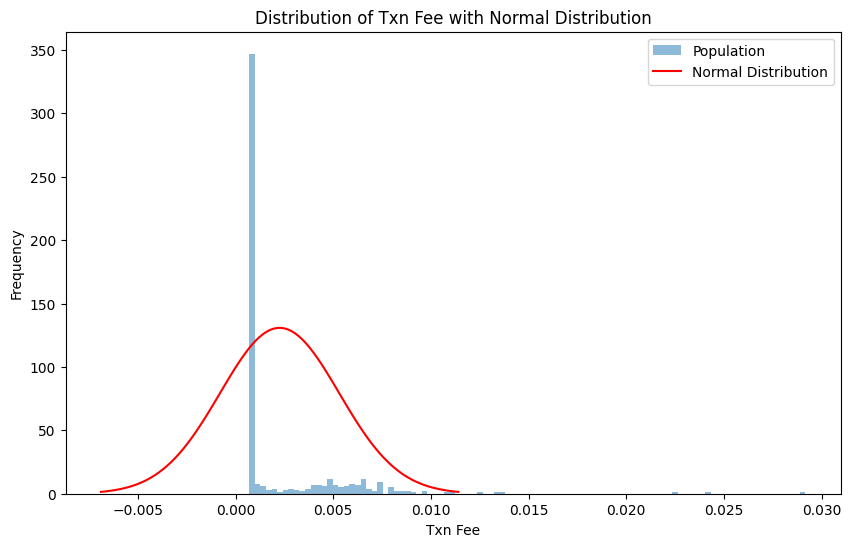

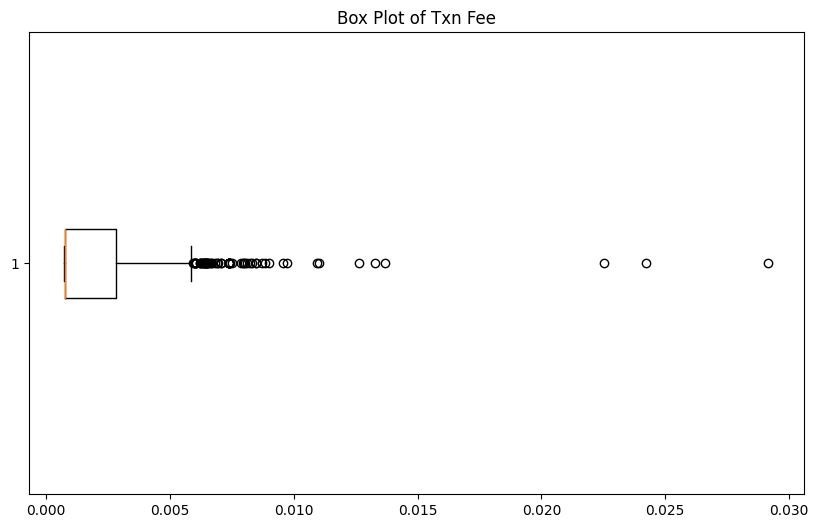

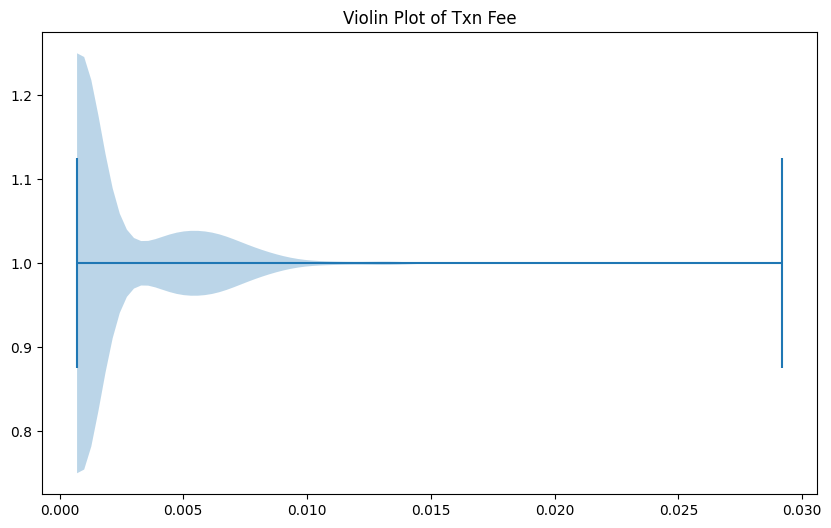

Value Mean: 0.5225074954208417, Value Standard Deviation: 3.102231326656047


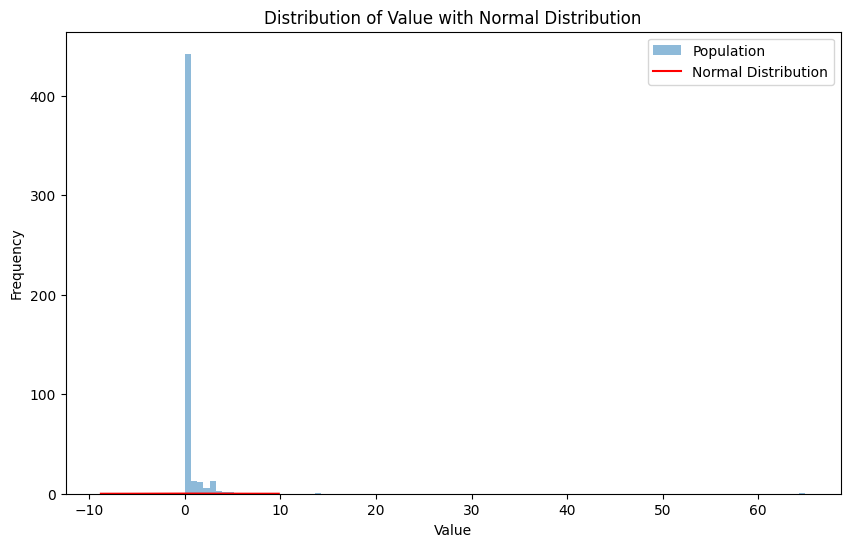

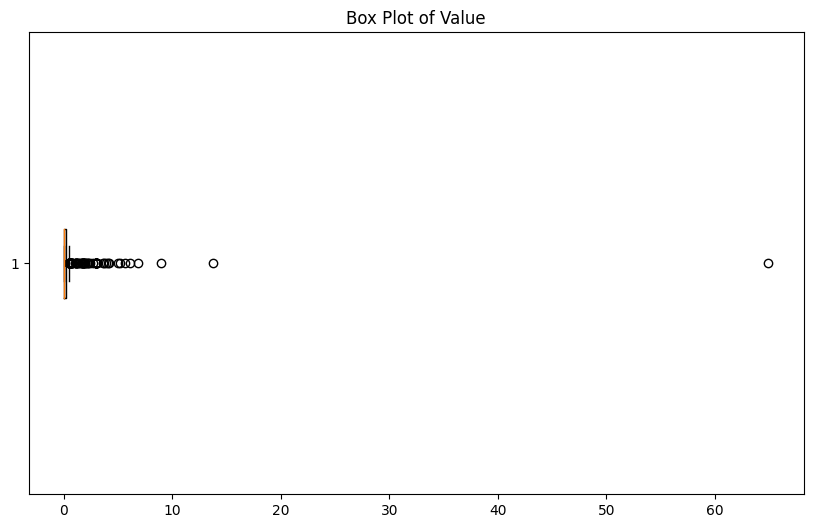

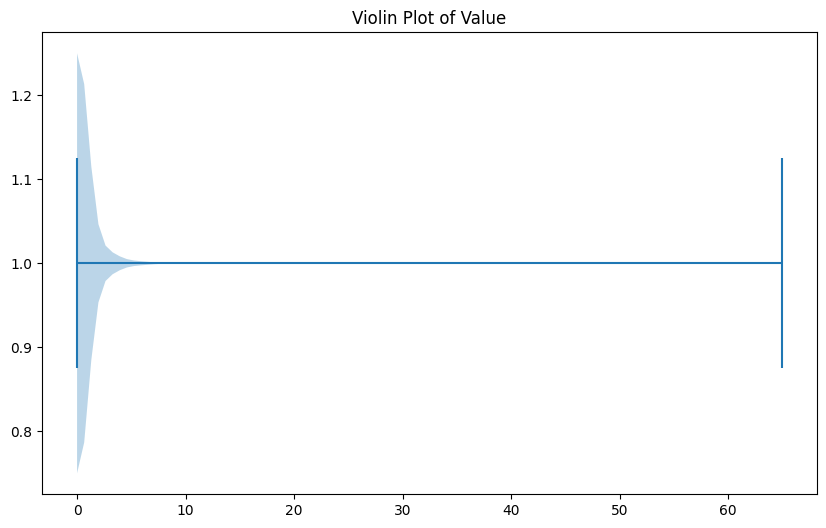

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def analyze_and_visualize(df, column_name):
    mean = df[column_name].mean()
    std = df[column_name].std()
    
    # Simple statistics
    print(f"{column_name} Mean: {mean}, {column_name} Standard Deviation: {std}")
    
    # Histogram
    plt.figure(figsize=(10,  6))
    plt.hist(df[column_name], bins=100, alpha=0.5, label='Population')
    
    # Normal Distribution Plot
    x = np.linspace(mean -  3*std, mean +  3*std,  100)
    plt.plot(x, (1/(std * np.sqrt(2 * np.pi))) * np.exp( - (x - mean)**2 / (2 * std**2) ), 'r-', label='Normal Distribution')
    
    plt.xlabel(f'{column_name}')
    plt.ylabel('Frequency')
    plt.legend(loc='upper right')
    plt.title(f'Distribution of {column_name} with Normal Distribution')
    plt.show()
    
    # Box Plot
    plt.figure(figsize=(10,  6))
    plt.boxplot(df[column_name], vert=False)
    plt.title(f'Box Plot of {column_name}')
    plt.show()
    
    # Violin Plot
    plt.figure(figsize=(10,  6))
    plt.violinplot(df[column_name], vert=False)
    plt.title(f'Violin Plot of {column_name}')
    plt.show()

analyze_and_visualize(df, 'Txn Fee')
analyze_and_visualize(df, 'Value')

## Demonstrating the Central Limit Theorem

The final task is to demonstrate the Central Limit Theorem (CLT) by showing that the distribution of sample means approaches a normal distribution as the sample size increases. This will involve drawing multiple samples from the dataset and calculating their means.

### Steps

1. **Define the Function**: Write a function that draws samples from the dataset and calculates their means.

2. **Draw Samples**: Use the function to draw samples of different sizes and calculate their means.

3. **Plot the Histograms**: Plot the histograms of the sample means to visualize the distribution.

4. **Analyze the Results**: Interpret the results to demonstrate the CLT.

### Deliverables

- A function that draws samples from the dataset and calculates their means.
- A set of histograms showing the distribution of sample means for different sample sizes.
- An analysis of the histograms to demonstrate the Central Limit Theorem.

### Getting Started

Begin by defining the function that will draw samples and calculate their means. Then, use this function to draw samples of different sizes from the dataset and calculate their means. Plot the histograms of these sample means to visualize the distribution. Finally, analyze the histograms to demonstrate that the Central Limit Theorem.

0.5217125785100922


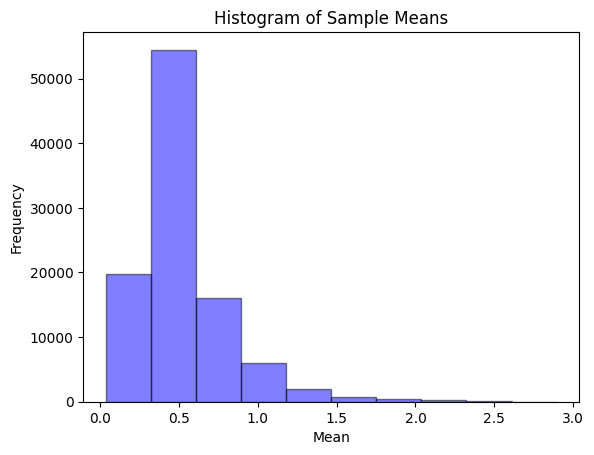

In [17]:
# Note: I think CLT is too much
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def sample_and_plot(df, num_samples, min_size, max_size):
    means = []
    sample_sizes = np.random.randint(min_size, max_size+1, num_samples)  # Randomly generate sample sizes
    
    for size in sample_sizes:
        sample = df.sample(n=size)  # Sample the dataframe
        mean = sample['Value'].mean()  # Calculate the mean of the 'Value' column in the sample
        means.append(mean)

    print(np.array(means).mean())
    
    # Plot histogram
    plt.hist(means, bins=10, alpha=0.5, color='b', edgecolor='black')
    plt.xlabel('Mean')
    plt.ylabel('Frequency')
    plt.title('Histogram of Sample Means')
    plt.show()

# Example usage:
# Assuming you already have a dataframe named df
# Define the number of samples to generate, and the minimum and maximum sample sizes
num_samples = 100000
min_size = 30
max_size = 200

# Call the function
sample_and_plot(df, num_samples, min_size, max_size)
